# Importing libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# or use - from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




#references
#https://www.simplilearn.com/tutorials/python-tutorial/matplotlib

# Loading the Data

In [2]:
#importing our stock data of NIFTY50 from 28-11-12 to 28-11-22

nifty50 = pd.read_csv(r'F:\Python\Project\stock\NSE.csv')

nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-29,5736.700195,5833.500000,5736.100098,5825.000000,5825.000000,0.0
1,2012-11-30,5836.000000,5885.250000,5827.850098,5879.850098,5879.850098,0.0
2,2012-12-03,5878.250000,5899.149902,5854.600098,5870.950195,5870.950195,0.0
3,2012-12-04,5866.799805,5894.950195,5859.000000,5889.250000,5889.250000,0.0
4,2012-12-05,5906.600098,5917.799805,5891.350098,5900.500000,5900.500000,0.0


In [3]:
nifty50.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2462,2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800.0
2463,2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700.0
2464,2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800.0
2465,2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000.0
2466,2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900.0


In [4]:
nifty50.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-29,5736.700195,5833.500000,5736.100098,5825.000000,5825.000000,0.0
1,2012-11-30,5836.000000,5885.250000,5827.850098,5879.850098,5879.850098,0.0
2,2012-12-03,5878.250000,5899.149902,5854.600098,5870.950195,5870.950195,0.0
3,2012-12-04,5866.799805,5894.950195,5859.000000,5889.250000,5889.250000,0.0
4,2012-12-05,5906.600098,5917.799805,5891.350098,5900.500000,5900.500000,0.0


# Data Preprocessing

In [5]:
#Dropping the rows which has null values

nifty50.dropna(inplace=True)


In [6]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2452 non-null   object 
 1   Open       2452 non-null   float64
 2   High       2452 non-null   float64
 3   Low        2452 non-null   float64
 4   Close      2452 non-null   float64
 5   Adj Close  2452 non-null   float64
 6   Volume     2452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 153.2+ KB


# Data Visualization

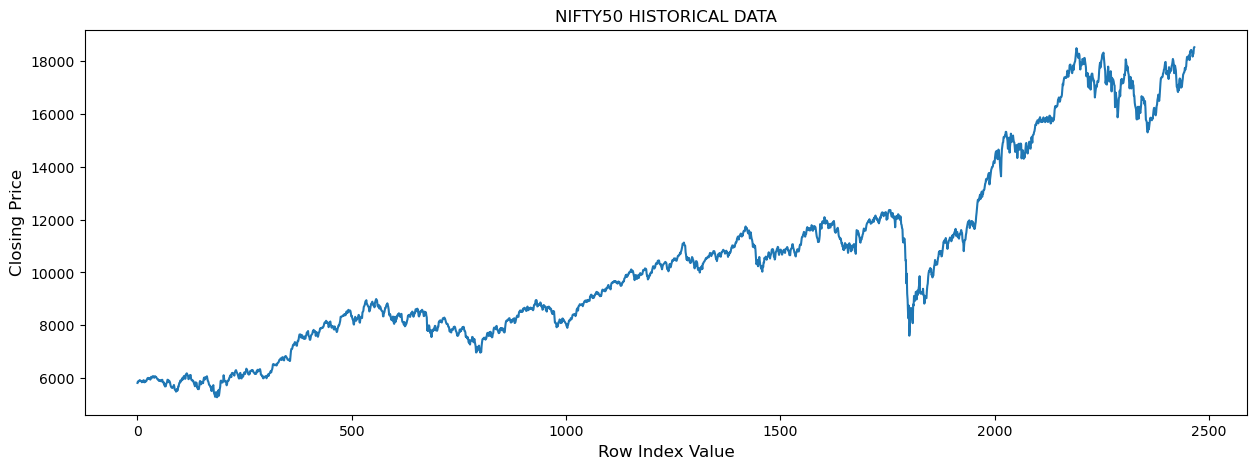

In [7]:
#pyplot is a module of matplotlib

#Plotting the close price in line chart

#The following plots can also be made from scratch using plt.figure method

#Data visualization is required so that we can infer trends and certain repeating patterns which will be helpful

plt.figure(figsize=(15,5))
plt.plot(nifty50['Close'])
plt.title('NIFTY50 HISTORICAL DATA', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xlabel('Row Index Value', fontsize=12)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4916\3441453541.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


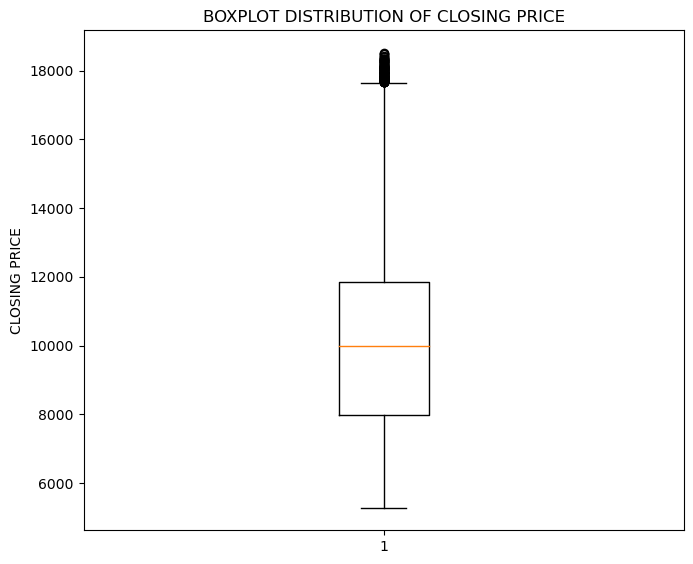

In [8]:
#Creating empty canvas
fig = plt.figure(figsize=[6,5])

#Setting Axes [Left,Bottom, Width, height]v
ax = fig.add_axes([0,0,1,1]) 

#Setting Titles
ax.set_title('BOXPLOT DISTRIBUTION OF CLOSING PRICE')
ax.set_ylabel('CLOSING PRICE')

#Calling Boxplot
ax.boxplot(nifty50['Close'])
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4916\64424449.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


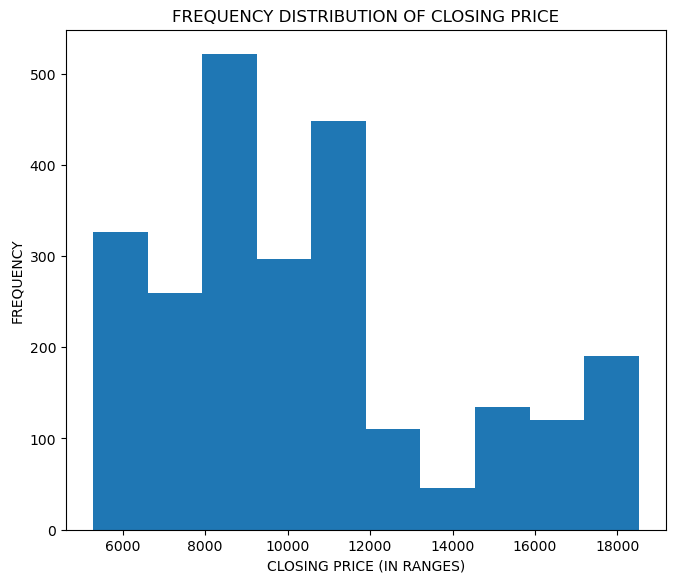

In [9]:
#Creating empty canvas
fig2 = plt.figure(figsize=[6,5])

#Setting Axes [Left,Bottom, Width, height]
ax2 = fig2.add_axes([0,0,1,1]) 

#Setting Titles
ax2.set_title('FREQUENCY DISTRIBUTION OF CLOSING PRICE')
ax2.set_xlabel('CLOSING PRICE (IN RANGES)')
ax2.set_ylabel('FREQUENCY')

#Calling Boxplot
ax2.hist(nifty50['Close'])
fig2.show()

# Feature Engineering

In [10]:
#Quarterly analysis

#Creating Day, Month & Year columns from Date Column
date = pd.DatetimeIndex(nifty50['Date'])
nifty50['Year'] = date.year
nifty50['Month'] = date.month
nifty50['Day'] = date.day

nifty50.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-11-29,5736.700195,5833.500000,5736.100098,5825.000000,5825.000000,0.0,2012,11,29
1,2012-11-30,5836.000000,5885.250000,5827.850098,5879.850098,5879.850098,0.0,2012,11,30
2,2012-12-03,5878.250000,5899.149902,5854.600098,5870.950195,5870.950195,0.0,2012,12,3
3,2012-12-04,5866.799805,5894.950195,5859.000000,5889.250000,5889.250000,0.0,2012,12,4
4,2012-12-05,5906.600098,5917.799805,5891.350098,5900.500000,5900.500000,0.0,2012,12,5


In [11]:
nifty50['Quarter End'] = np.where(nifty50['Month'] % 3 == 0,1,0)

nifty50.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Quarter End
0,2012-11-29,5736.700195,5833.500000,5736.100098,5825.000000,5825.000000,0.0,2012,11,29,0
1,2012-11-30,5836.000000,5885.250000,5827.850098,5879.850098,5879.850098,0.0,2012,11,30,0
2,2012-12-03,5878.250000,5899.149902,5854.600098,5870.950195,5870.950195,0.0,2012,12,3,1
3,2012-12-04,5866.799805,5894.950195,5859.000000,5889.250000,5889.250000,0.0,2012,12,4,1
4,2012-12-05,5906.600098,5917.799805,5891.350098,5900.500000,5900.500000,0.0,2012,12,5,1


C:\Users\User\AppData\Local\Temp\ipykernel_4916\2839818679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = nifty50.groupby('Year').mean()
C:\Users\User\AppData\Local\Temp\ipykernel_4916\2839818679.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)   # Here, 2,2 represents the no. of subplots = 4 i.e 2 rows and 2 columns.


              Open          High           Low         Close     Adj Close  \
Year                                                                         
2012   5887.086359   5910.813610   5857.161377   5887.452282   5887.452282   
2013   5917.063775   5952.302641   5875.485818   5913.363764   5913.363764   
2014   7371.185203   7408.704803   7330.370402   7370.956474   7370.956474   
2015   8294.980337   8335.235041   8234.672355   8283.386681   8283.386681   
2016   8095.398337   8132.563937   8043.390369   8088.159222   8088.159222   
2017   9596.844360   9625.885321   9554.504209   9590.717943   9590.717943   
2018  10759.185128  10802.830389  10696.462640  10750.673270  10750.673270   
2019  11447.320349  11498.030938  11373.915756  11435.851056  11435.851056   
2020  11165.962994  11245.230777  11057.114398  11152.998207  11152.998207   
2021  16042.683858  16118.128209  15928.560043  16026.760652  16026.760652   
2022  17115.606949  17211.881210  17002.660993  17114.146646  17

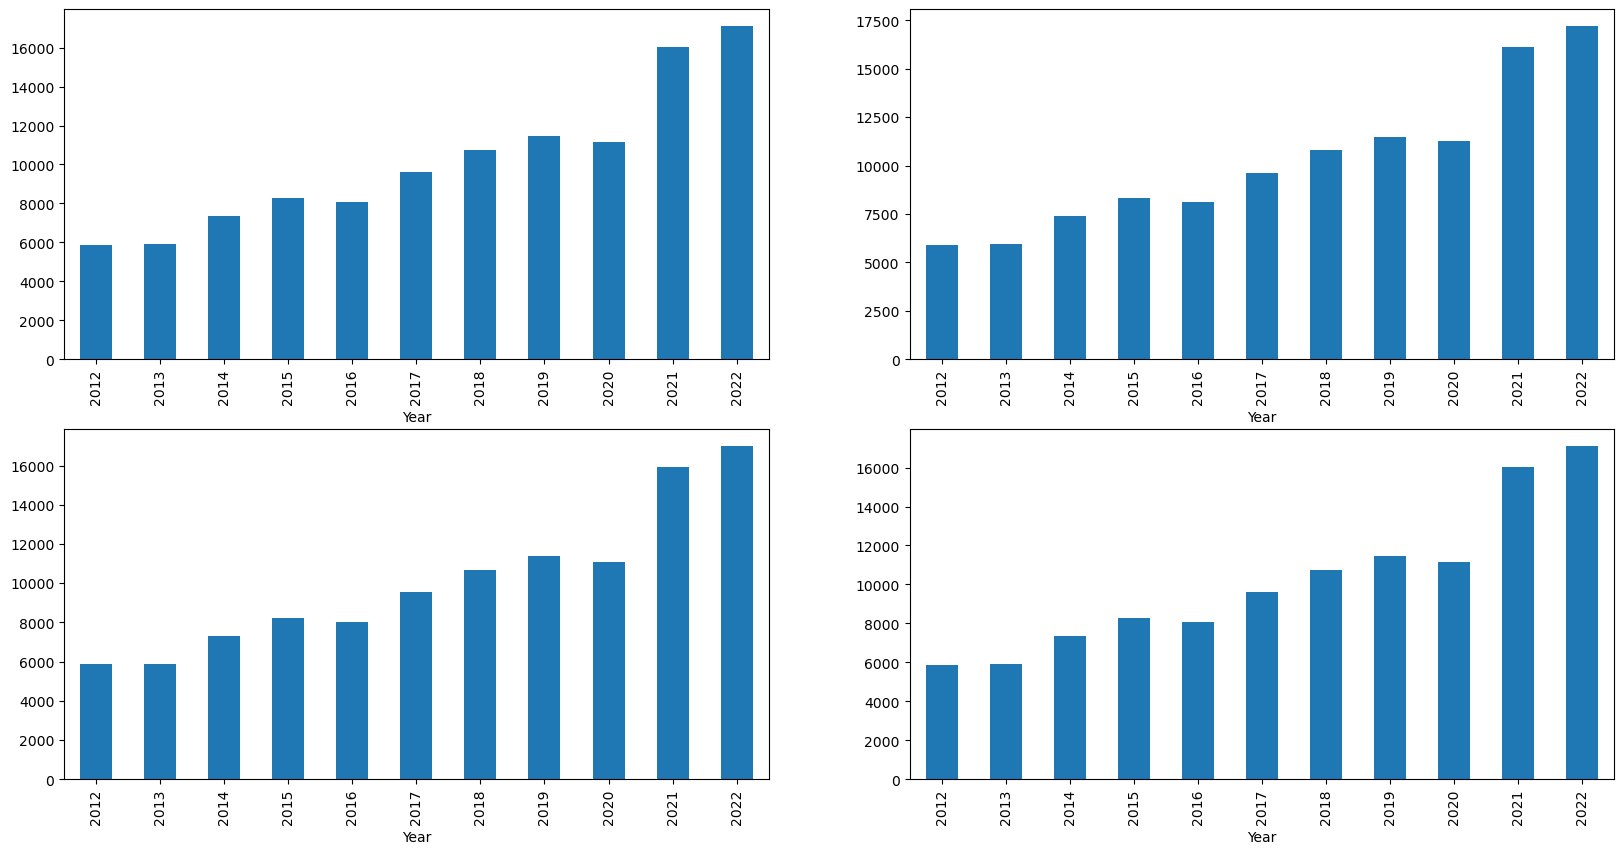

In [12]:
# Here we group data according to Year i.e we find mean values of all the data for each year 
data_grouped = nifty50.groupby('Year').mean()
plt.subplots(figsize=(20,10))
print(data_grouped)


# enumerate function returns a sequence of (index, item) tuple. Hence, this function automatically assigns an index value to the 
# item passed. 

# Here we create a list with the following names to pass it in the loop, which'll create seperate bar charts for the open, close
# high & low according to the year
list1 = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(list1):
    plt.subplot(2,2,i+1)   # Here, 2,2 represents the no. of subplots = 4 i.e 2 rows and 2 columns.
    data_grouped[col].plot.bar()
plt.show()


In [13]:
#To get the mean value of OHLC Values based on quater end or not 

nifty50.groupby('Quarter End').mean()

#From the data below, we infer that stocks are traded in more amount in volumes & prices are lower at quarter end 


C:\Users\User\AppData\Local\Temp\ipykernel_4916\3590563013.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nifty50.groupby('Quarter End').mean()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Quarter End,,,,,,,,,
0,10537.445651,10587.854731,10468.858207,10529.924313,10529.924313,294462.469136,2017.491975,5.990741,15.864815
1,10397.096394,10451.869655,10323.446433,10388.375201,10388.375201,295160.817308,2017.284856,7.546875,15.657452


In [14]:
# Since we have found that all the OHLC data are positively correlated with each other, we can reduce the columns from 4 to 2. 
# This will help us later in training & testing our model

nifty50['open-close'] = nifty50['Open'] - nifty50['Close']

nifty50['low-high'] = nifty50['Low'] - nifty50['High']

print(nifty50['open-close'])

print()

print(nifty50['low-high'])

0       -88.299805
1       -43.850098
2         7.299805
3       -22.450195
4         6.100098
           ...    
2462     86.451172
2463    -65.048828
2464     57.949219
2465   -158.000000
2466     15.699219
Name: open-close, Length: 2452, dtype: float64

0       -97.399902
1       -57.399902
2       -44.549804
3       -35.950195
4       -26.449707
           ...    
2462   -128.951172
2463   -124.150390
2464    -79.400391
2465   -235.449219
2466    -89.800782
Name: low-high, Length: 2452, dtype: float64


0       1
1       0
2       1
3       1
4       1
       ..
2462    1
2463    1
2464    1
2465    1
2466    0
Name: target, Length: 2452, dtype: int32


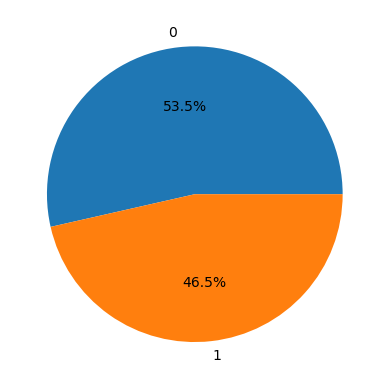

In [15]:
# Since we predict the closing price, close becomes our Target variable

# syntax : numpy.where(condition, True, False)
# The shift function basically shift the rows. Here, it shifts one up. So, the code is, if next day closing price is greater 
# than today's closing we assign 1, otherwise 0.

nifty50['target'] = np.where(nifty50['Close'].shift(-1) > nifty50['Close'], 1, 0)

print(nifty50['target'])

plt.pie(nifty50['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')

plt.show()

# From pie chart, we infer that the dataset is balanced.

C:\Users\User\AppData\Local\Temp\ipykernel_4916\3424394372.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(nifty50.corr() > 0.9, annot=True, cbar=False)


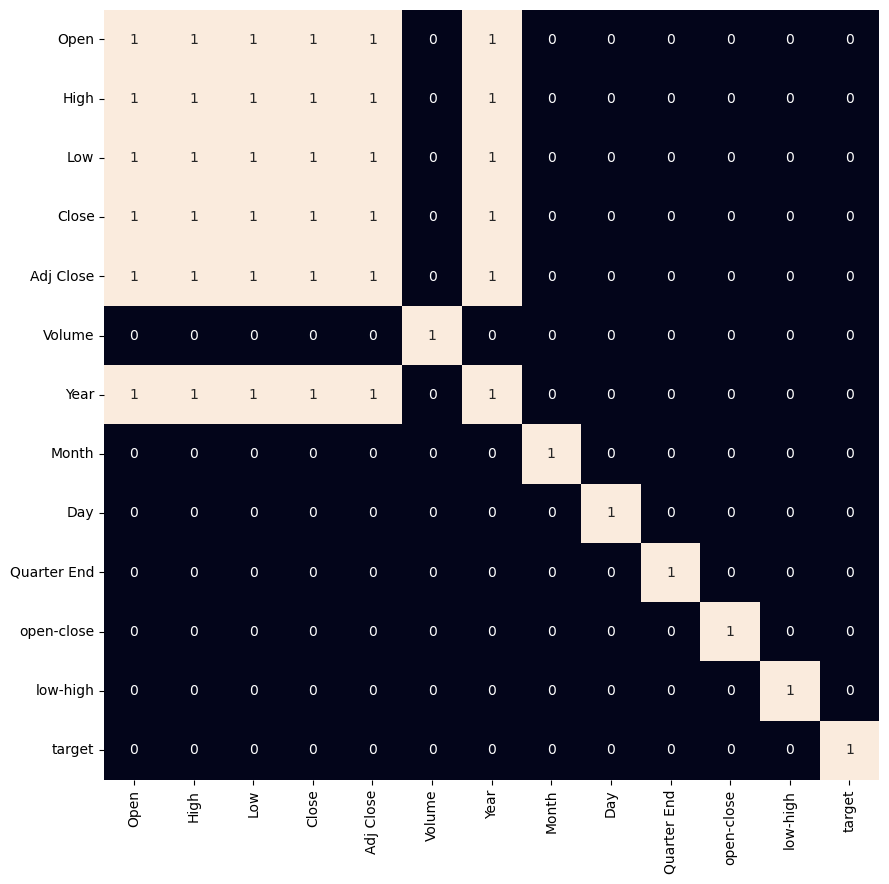

In [16]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly correlated features only so, we will visualize
# our heatmap as per that criteria only.

sb.heatmap(nifty50.corr() > 0.9, annot=True, cbar=False)
plt.show()

# from heatmap, we can see there's a correlation between ohlc and year

# Model

In [17]:
'''
1. Training
The train dataset is split into two, X & Y. X contains al the input data values, in our case it is open- close, low-high &
Quarter End. The model looks for patterns in X. Y contains the end goal i.e the data to be predicted. It tries to learn using 
X & Y and create a model using .fit().  

2. Testing
After creating our model, we now can test it or we can right away feed data and get predictions. For testing, we input X &
Y variable into our model & it'll tell us how well the model predicted our output Y by comparing it with our input Y. 

'''

#Selecting the features/columns/input variable i.e X variable for our model
features = nifty50[['open-close', 'low-high', 'Quarter End']]

#Selecting target variable Y
target = nifty50['target']

#Data Pre-processing
scaler = StandardScaler()
features = scaler.fit_transform(features)

# test_size - Feeding 90% data for training & 10% data for testing
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)

print('Training Dataset Shape = {0} \n Validation Dataset Shape = {1}'.format(X_train.shape, X_valid.shape))
#Here, X's are features/columns/input used for training and Y's are expected outcomes or Ouput

Training Dataset Shape = (2206, 3) 
 Validation Dataset Shape = (246, 3)


In [18]:

# Model training using .fit
model = LogisticRegression()
model.fit(X_train, Y_train)

print('Training Accuracy : ',metrics.roc_auc_score(Y_train,model.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ',metrics.roc_auc_score(Y_valid,model.predict_proba(X_valid)[:,1]))

Training Accuracy :  0.5432095094864444
Validation Accuracy :  0.49613539445628996


In [23]:

# model predicts based on [open-close, low-high, Quarter end]
'''
The data for the next market day i.e 29/11/22 for NIFTY50 was obtained.
Open = 18552.45 ; Close = 18618.05 ; Low = 18552.15 ; High = 18678.10
so, Open-Close = -59.6 ; Low-High = -125.95 ; Quarter End = 0

'''

model.predict(np.array([[-59.6,-125.95,0]]))

#The model predicts that the close price for the next market day (30/11/22) will be higher and it did predict right.
#The closing price on 30/11/22 was 18758.35

array([1])